In [83]:
import numpy as np
from scipy.stats import norm, chisquare, maxwell
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../python/")
sys.path.insert(0, "../")
import vsim.load as load
import vsim.analyze as analyze
import h5py
import matplotlib.mlab as mlab
global kb, me
plt.style.use('Presentation')
kb = 1.38064852e-23; # J/K
me  = 9.10938356e-31; # kg

In [2]:
simPath = '/media/keenan/Data_Storage/Google Drive/CU/PWFA/'
simName = 'laserIonize'
speciesName = 'ionizedElectrons'
savePath = '/home/keenan/Dropbox/Research/notes/2018/09/'

In [3]:
elec_data = load.get_species_data(simPath + simName + '_' + speciesName + \
                                  '_14.h5', speciesName)
elec_data = np.array(elec_data)

In [4]:
ux = elec_data[:,3]; uy = elec_data[:,4]; uz = elec_data[:,5];
weights = elec_data[:,-1]

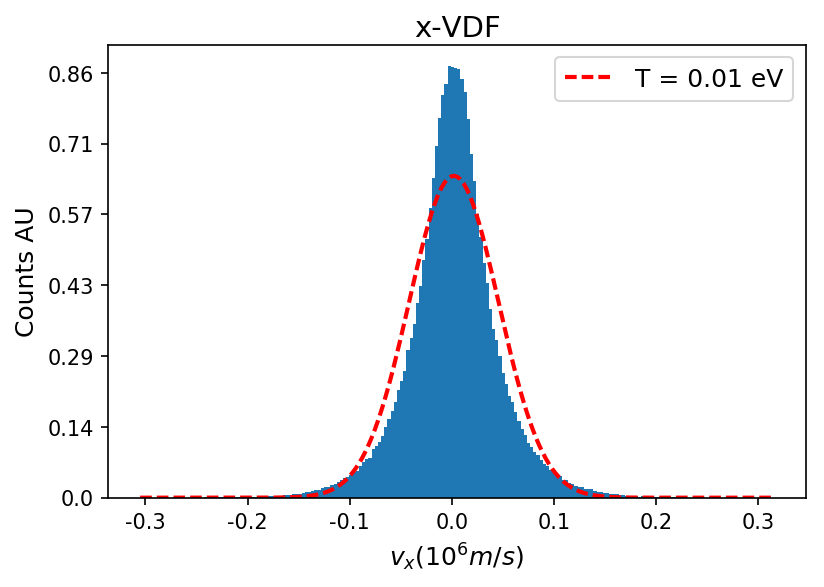

In [5]:
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
(mu, sigma) = norm.fit(ux)
Tx = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(ux , 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.2f' % Tx + ' eV')
ax.set_title('x-VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v_x (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
plt.savefig(savePath + '3D_vx_dist.png')
plt.show()

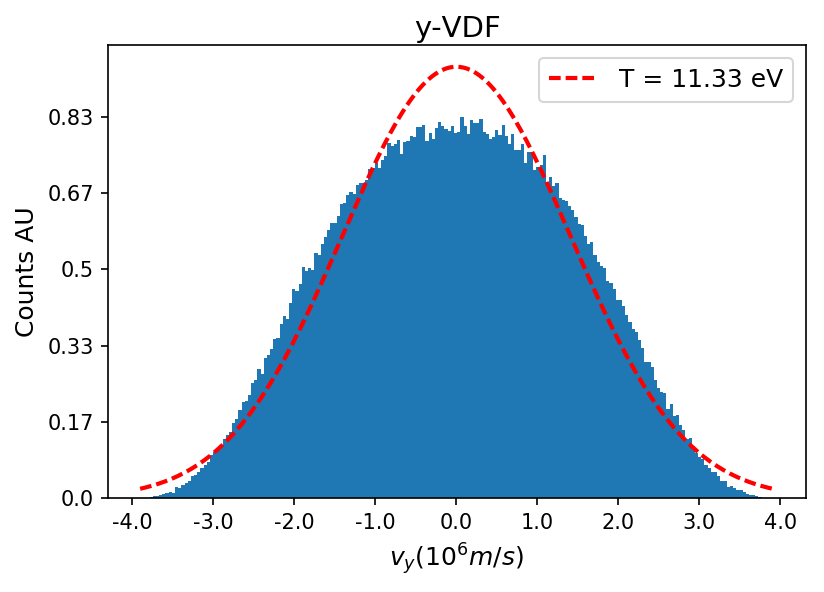

In [6]:
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
(mu, sigma) = norm.fit(uy)
Ty = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(uy , 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.2f' % Ty + ' eV')
ax.set_title('y-VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v_y (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
plt.savefig(savePath + '3D_vy_dist.png')
plt.show()

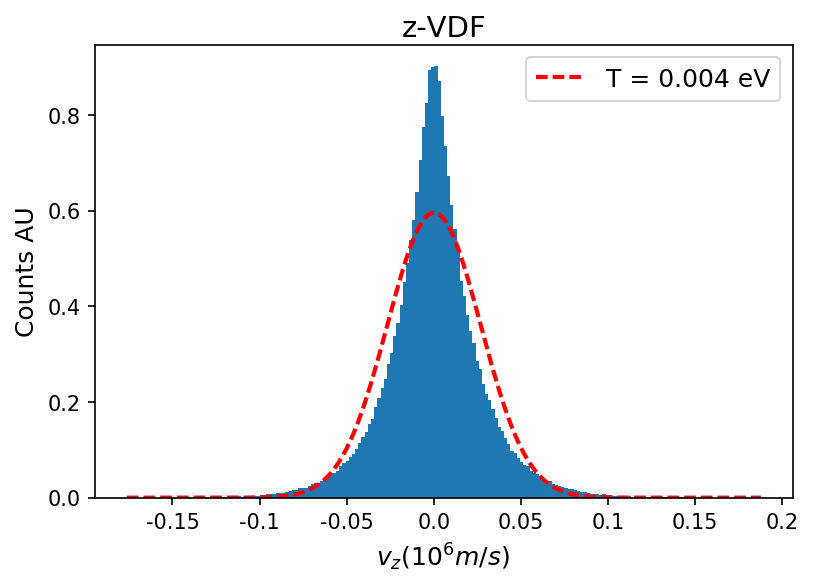

In [7]:
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
(mu, sigma) = norm.fit(uz)
Tz = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(uz , 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.3f' % Tz + ' eV')
ax.set_title('z-VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v_z (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
plt.savefig(savePath + '3D_vz_dist.png')
plt.show()

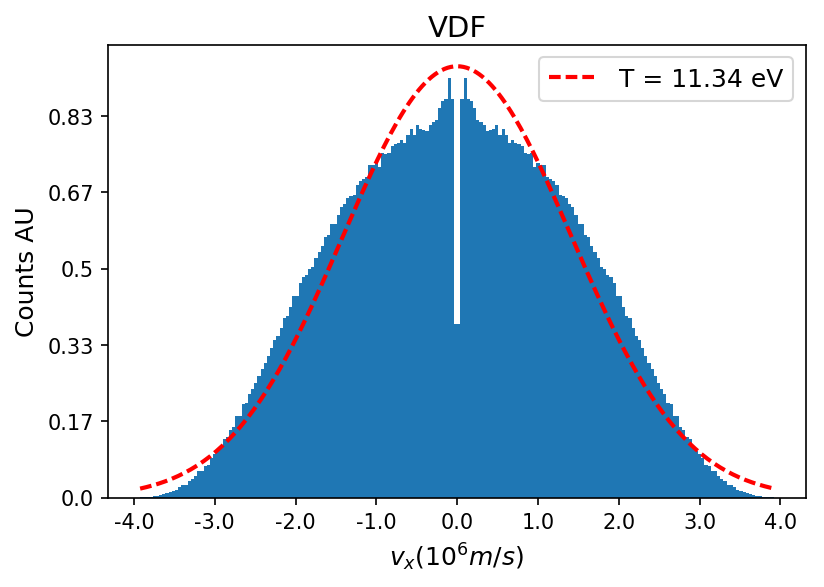

In [19]:
u = np.sqrt(ux**2 + uy**2 + uz**2)
um = -u
u = um.tolist() + u.tolist()
weights_u = weights.tolist() +  weights.tolist()
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
(mu, sigma) = norm.fit(u)
T = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(u , 200, weights = weights_u, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.2f' % T + ' eV')
ax.set_title('VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v_x (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
plt.savefig(savePath + '3D_v_dist.png')
plt.show()

In [4]:
# Get a_0 vs temperature
a0 = np.array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1])
a0_str = np.array([str(i) for i in a0])
fin_ind = 21;

In [5]:
simPath = '/media/keenan/Data_Storage/VSim/Ionization/laserIonize'
file = 'laserIonize_ionizedElectrons_21.h5'

In [7]:
T1 = np.zeros(len(a0))
T2 = np.zeros(len(a0))

In [8]:
data = {}
for i in range(len(a0)):
    data[a0_str[i]] = load.get_species_data(simPath + a0_str[i] + '/' + file, \
                                'ionizedElectrons')

In [35]:
def get_T1(data,  peak2 = False):
    uy = analyze.get_uy(data)
    if peak2:
        uy_correct = np.zeros(len(uy))
        mean = np.mean(abs(uy))
        for i in range(len(uy)):
            
            if uy[i] < 0:
                uy_correct[i] = uy[i] + mean
            else:
                uy_correct[i] = uy[i] - mean
        (mu, sigma) = norm.fit(uy_correct)
    else:
        (mu, sigma) = norm.fit(uy)
        
    return (me * sigma**2 / kb)/11600;

def get_T2(data,  peak2 = False):
    uy = analyze.get_uy(data)
    ux = analyze.get_ux(data)
    if peak2:
        uy_correct = np.zeros(len(uy))
        mean = np.mean(abs(uy))
        for i in range(len(uy)):
            
            if uy[i] < 0:
                uy_correct[i] = uy[i] + mean
            else:
                uy_correct[i] = uy[i] - mean
        u = np.sqrt(uy_correct**2 + ux**2)
    else:
        u = np.sqrt(uy**2 + ux**2)
    (mu, sigma) = norm.fit(uy) 
    return (me * sigma**2 / kb)/11600;

In [36]:
for i in range(len(a0)):
    if i < 5:
        T1[i] = get_T1(data[a0_str[i]], peak2 = False)
        #T2[i] = get_T2(data[a0_str[i]], peak2 = False)
    else:
        T1[i] = get_T1(data[a0_str[i]], peak2 = True)
        #T2[i] = get_T2(data[a0_str[i]], peak2 = True)
    
    

In [37]:
for i in range(len(a0)):
    if i < 5:
        #T1[i] = get_T1(data[a0_str[i]], peak2 = False)
        T2[i] = get_T2(data[a0_str[i]], peak2 = False)
    else:
        #T1[i] = get_T1(data[a0_str[i]], peak2 = True)
        T2[i] = get_T2(data[a0_str[i]], peak2 = True)

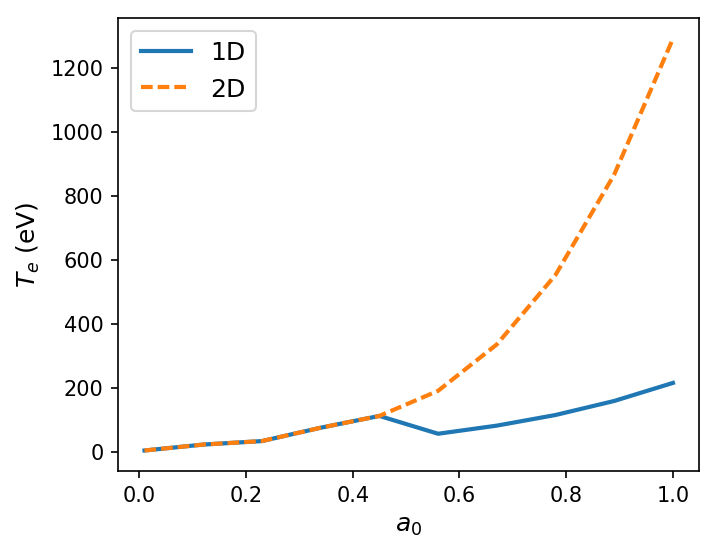

In [38]:
fig = plt.figure(figsize = (5,4), dpi = 150)
ax = fig.gca()
ax.set_xlabel(r'$a_0$')
ax.set_ylabel(r'$T_e$ (eV)')
ax.plot(a0, T1, label = '1D')
ax.plot(a0, T2, ls = '--', label = '2D')
plt.legend()
plt.savefig(savePath + 'temp_v_a0_both_dir.png')
plt.show()

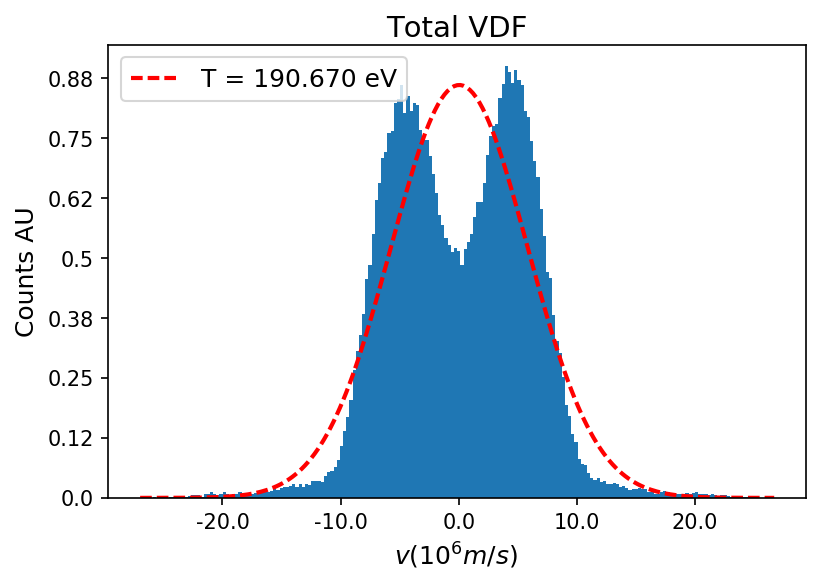

0.56


In [49]:
ind = 5
test = data[a0_str[ind]]
uy = analyze.get_uy(test)
ux = analyze.get_ux(test)
weights = analyze.get_weights(test)
#weights = weights.tolist() + weights.tolist()
u_correct = np.zeros(len(uy))
mean = np.mean(abs(uy))
for i in range(len(uy)):
    if uy[i] < 0:
        u_correct[i] = uy[i] + mean
    else:
        u_correct[i] = uy[i] - mean
u = np.sqrt(u_correct**2 + ux**2)
#um = -u
#u = um.tolist() + u.tolist()
(mu, sigma) = norm.fit(uy)
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
Ty = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(uy, 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.3f' % Ty + ' eV')
ax.set_title('Total VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
#plt.savefig(savePath + 'total_vdf_a0_1_correct.png')
plt.show()
print(a0[ind])

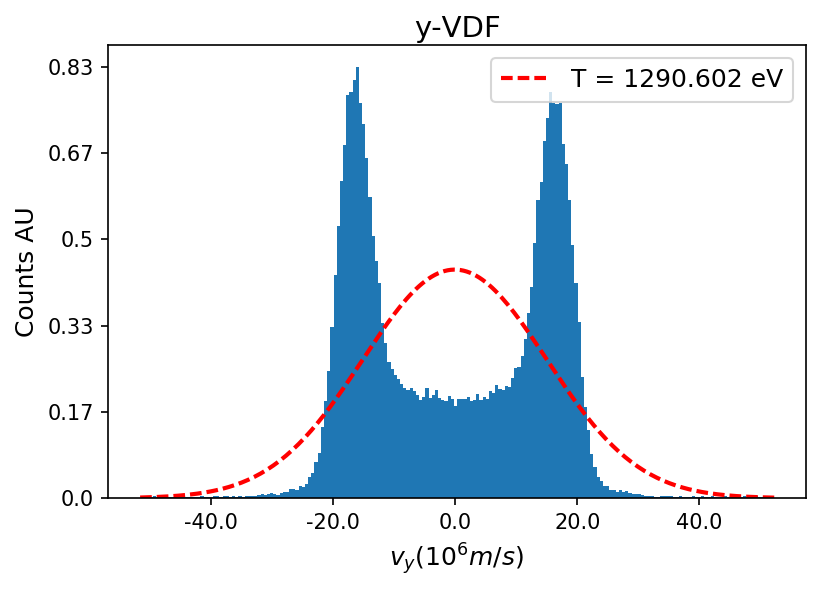

In [26]:
fig = plt.figure(figsize = (6,4), dpi = 150)
ax = fig.gca()
(mu, sigma) = norm.fit(uy)
Ty = (me * sigma**2 / kb)/11600;
n, bins, patches = ax.hist(uy, 200, weights = weights, normed = True)
y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y , '--r', label = 'T = %.3f' % Ty + ' eV')
ax.set_title('y-VDF')
xlocs = ax.get_xticks()
ylocs = ax.get_yticks()
ylocs = np.round(np.linspace(0, 1, len(ylocs)),2)
ax.set_yticklabels(ylocs)
ax.set_xticklabels(xlocs/1e6)
ax.set_xlabel(r'$v_y (10^6 m/s)$ ')
ax.set_ylabel('Counts AU')
ax.legend()
plt.savefig(savePath + 'Uncorrected_y_vdf.png')
plt.show()

In [139]:
# Custom fitting the y distribution with two curves to correct for twin peaks
def my_func(v, A, s, B):
    #B = np.mean(abs(v))
    #s = np.sqrt(kb*T/me)
    return ((A) * (2*np.pi)**(-.5)) * (np.exp(-(v-B)**2 / (2*s**2)) + np.exp(-(v+B)**2 / (2*s**2)))
            

In [149]:
T = np.zeros(len(a0))
for i in range(len(a0)):
    uy = analyze.get_uy(data[a0_str[i]])
    weights = analyze.get_weights(data[a0_str[i]])
    n, bins, patches = plt.hist(uy, 200, weights = weights, normed = True)
    popt, pcov = cf(my_func, bins[0:-1], n, p0 = [7e-8, .5e7, .5e7])
    sigma = popt[1]
    T[i] = (me*sigma**2/kb)/11600


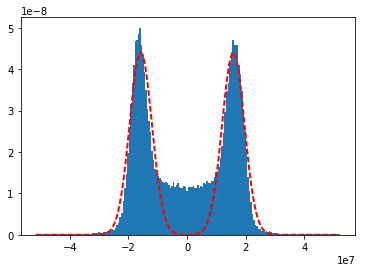

In [166]:
ind = 9;
uy = analyze.get_uy(data[a0_str[ind]])
weights = analyze.get_weights(data[a0_str[ind]])
n, bins, patches = plt.hist(uy, 200, weights = weights, normed = True)
popt, pcov = cf(my_func, bins[0:-1], n, p0 = [7e-8, .5e7, .5e7])
f = my_func(bins[0:-1], *popt)
plt.plot(bins[0:-1], f, '--r')
plt.show()